In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplcyberpunk
import os,sys
import pandas as pd
from scipy.stats.kde import gaussian_kde as kde
## Importing the accompanying utility and analysis files
## point to my utils/analysis code
hbpmloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/HAYstack/'
sys.path.append(os.path.abspath(hbpmloc+'hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 12.0
matplotlib.rcParams['ytick.labelsize'] = 12.0
matplotlib.rcParams['axes.labelsize'] = 14.0
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])

## Uniform Prior

In [ ]:
## set up lists for each configuration option
top = './paper_data/monte_carlo_data/all_distance_distributions/'
runs = ['O4','O5','O4O5','Aplus4yr']
eoss = ['sly4','sfhx','dd2']
categories = ['null','post']

In [4]:
## build dict
validation_dict = {}
for run in runs:
    validation_dict[run] = {}
    validation_dict[run]['null'] = pd.read_csv(top+run+'_null_validation.csv',header=0)
    ## A+ 4yr only has SFHX.
    if run!='Aplus4yr':
        eos_sublist = eoss
    else:
        eos_sublist = ['sfhx']
    for eos in eos_sublist:
        validation_dict[run][eos] = pd.read_csv(top+eos+run+'_post_validation.csv',header=0)

In [6]:
for run in runs:
    null_CI_vals = validation_dict[run]['null']['null_CI'].to_numpy()
    print(run)
    print(null_CI_vals.min(),null_CI_vals.max())

O4
5.6381909547738704 5.78894472361809
O5
5.24623115577889 5.8190954773869406
O4O5
5.155778894472361 5.849246231155781
Aplus4yr
4.0402010050251205 5.879396984924621


95\% Confidence Interval Version

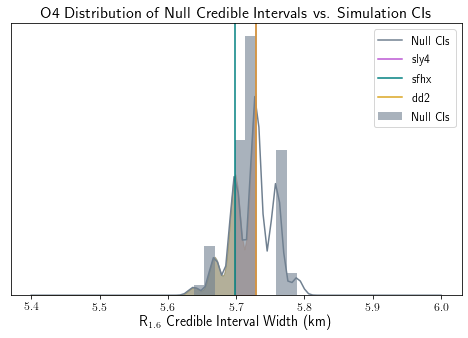

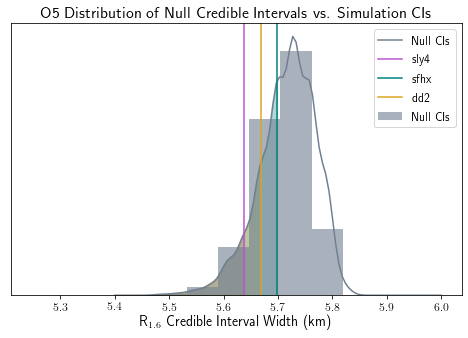

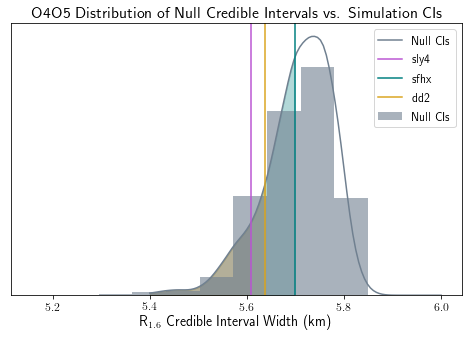

In [8]:
## C.I. version
for run in ['O4','O5','O4O5']:
    null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 5.4
    upper=6
    Npoints = 100
    CI_xs = np.linspace(lower,upper,Npoints)
    CI_maxi = np.argmax(null_CI_dist(CI_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
    plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
    plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
        fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
        plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
    plt.gca().set_yticks([])
    plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
    plt.legend()
    # plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
    plt.show()

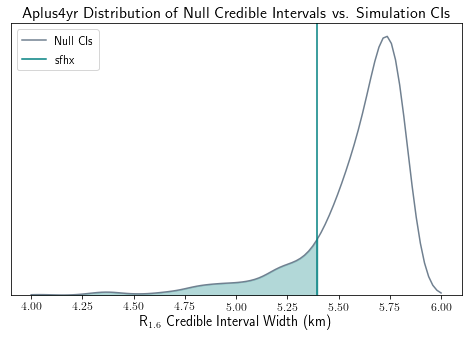

In [9]:
## C.I. version - A+
run = 'Aplus4yr'
null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
colors=['mediumorchid','teal','goldenrod']
lower = 4
upper=6
Npoints = 100
CI_xs = np.linspace(lower,upper,Npoints)
CI_maxi = np.argmax(null_CI_dist(CI_xs))
plt.figure()
plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
# plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
# for eos,color in zip(eoss,colors):
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
plt.legend()
# plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
plt.show()

Wasserstein Distance Version

In [10]:
for run in runs:
    null_WD_vals = validation_dict[run]['null']['null_WD'].to_numpy()
    print(run)
    print(null_WD_vals.min(),null_WD_vals.max())

O4
0.0190493544293033 0.364828675194198
O5
0.0278026381145914 0.775383508012845
O4O5
0.0301291287251763 1.03413022852009
Aplus4yr
0.0666504104648328 1.8006256992325402


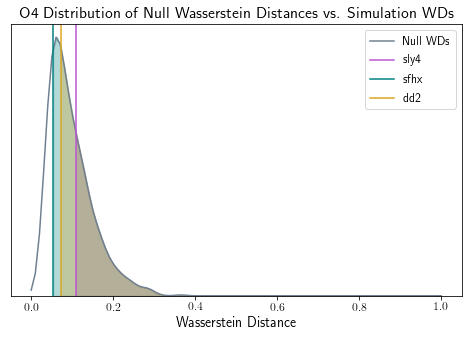

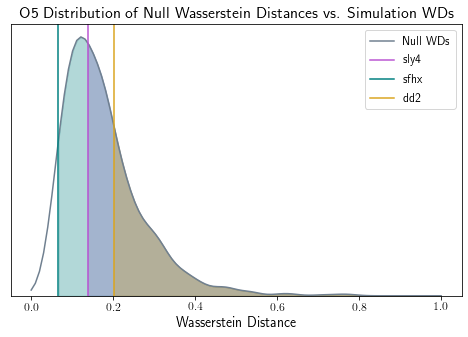

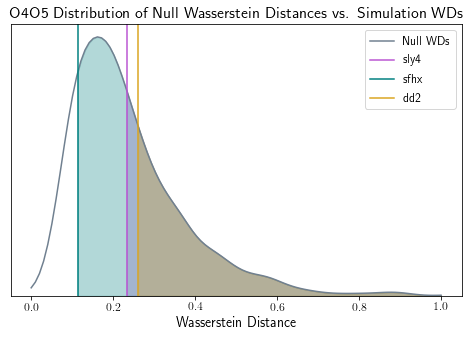

In [11]:
## O4/O5/O4O5 WD version
for run in ['O4','O5','O4O5']:
    null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 0
    upper = 1
    Npoints = 100
    WD_xs = np.linspace(lower,upper,Npoints)
    WD_maxi = np.argmax(null_WD_dist(WD_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
    plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
        fill_xs = np.linspace(validation_dict[run][eos]['post_WD'][0],upper,Npoints)
        plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
    plt.gca().set_yticks([])
    plt.xlabel('Wasserstein Distance')
    plt.legend()
    # plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
    plt.show()

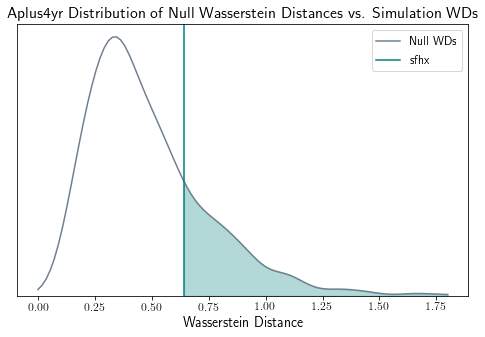

In [12]:
## O4/O5/O4O5 WD version
run = 'Aplus4yr'
null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
colors=['mediumorchid','teal','goldenrod']
lower = 0
upper = 1.8
Npoints = 100
WD_xs = np.linspace(lower,upper,Npoints)
WD_maxi = np.argmax(null_WD_dist(WD_xs))
plt.figure()
plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
fill_xs = np.linspace(validation_dict[run][eos]['post_WD'][0],upper,Npoints)
plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('Wasserstein Distance')
plt.legend()
# plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
plt.show()

## Multimessenger Prior

In [14]:
## set up lists for each configuration option
top = './paper_data/monte_carlo_data/all_distance_distributions/'
runs = ['O4O5','Aplus4yr']
eoss = ['sly4','sfhx','dd2']
categories = ['null','post']

In [25]:
## build dict
validation_dict = {}
for run in runs:
    ## A+ 4yr only has SFHX & does not have an EoS prefix
    if run!='Aplus4yr':
        eos_sublist = eoss
        eos_nulllist = eoss
    else:
        eos_sublist = ['sfhx']
        eos_nulllist = ['']
    validation_dict[run] = {}
    for eos,name in zip(eos_sublist,eos_nulllist):
        validation_dict[run]['null'] = pd.read_csv(top+name+run+'_multimessenger_null_validation.csv',header=0)
        validation_dict[run][eos] = pd.read_csv(top+name+run+'_multimessenger_post_validation.csv',header=0)

In [26]:
for run in runs:
    null_CI_vals = validation_dict[run]['null']['null_CI'].to_numpy()
    print(run)
    print(null_CI_vals.min(),null_CI_vals.max())

O4O5
1.7788944723618103 2.83417085427136
Aplus4yr
0.934673366834172 3.01507537688442


95\% Confidence Interval Version

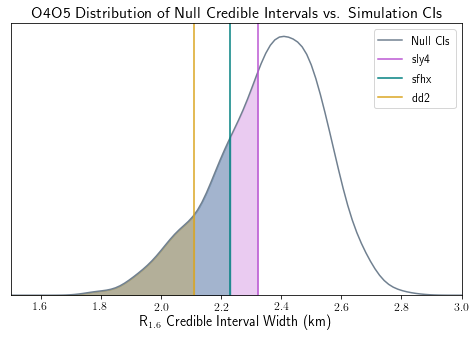

In [31]:
## C.I. version
for run in ['O4O5']:
    null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 1.5
    upper=3
    Npoints = 100
    CI_xs = np.linspace(lower,upper,Npoints)
    CI_maxi = np.argmax(null_CI_dist(CI_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
#     plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
    plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
        fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
        plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
    plt.xlim(1.5,3)
    plt.gca().set_yticks([])
    plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
    plt.legend()
    # plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
    plt.show()

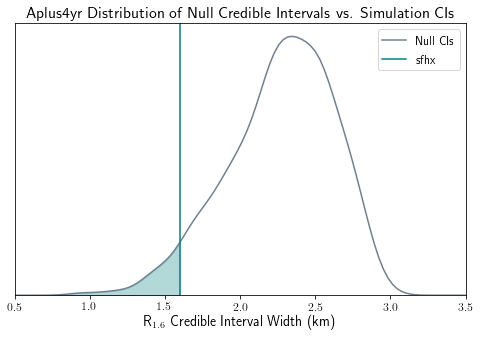

In [33]:
## C.I. version - A+
run = 'Aplus4yr'
null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
colors=['mediumorchid','teal','goldenrod']
lower = 0.5
upper = 3.5
Npoints = 100
CI_xs = np.linspace(lower,upper,Npoints)
CI_maxi = np.argmax(null_CI_dist(CI_xs))
plt.figure()
plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
# plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
# for eos,color in zip(eoss,colors):
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.xlim(lower,upper)
plt.gca().set_yticks([])
plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
plt.legend()
# plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
plt.show()

Wasserstein Distance Version

In [34]:
for run in runs:
    null_WD_vals = validation_dict[run]['null']['null_WD'].to_numpy()
    print(run)
    print(null_WD_vals.min(),null_WD_vals.max())

O4O5
0.178565007606966 0.791932226490953
Aplus4yr
0.13720701517071301 1.02636047241271


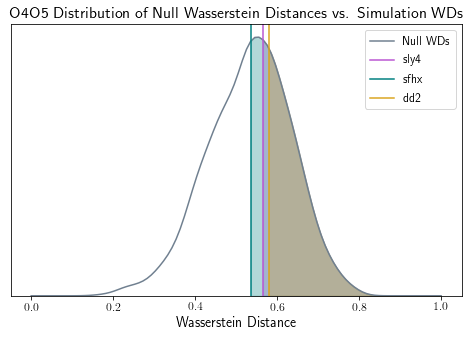

In [39]:
## O4/O5/O4O5 WD version
for run in ['O4O5']:
    null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 0
    upper = 1
    Npoints = 100
    WD_xs = np.linspace(lower,upper,Npoints)
    WD_maxi = np.argmax(null_WD_dist(WD_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
    plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['dd2_WD'][0],label=eos,color=color)
        fill_xs = np.linspace(validation_dict[run][eos]['dd2_WD'][0],upper,Npoints)
        plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
    plt.gca().set_yticks([])
    plt.xlabel('Wasserstein Distance')
    plt.legend()
    # plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
    plt.show()

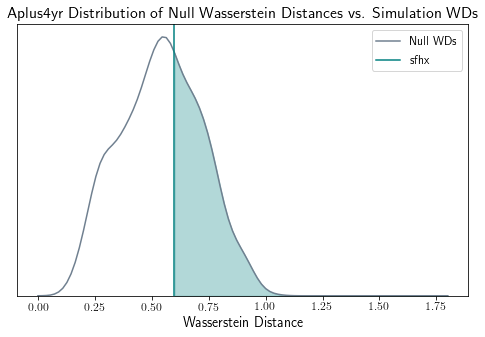

In [41]:
## O4/O5/O4O5 WD version
run = 'Aplus4yr'
null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
colors=['mediumorchid','teal','goldenrod']
lower = 0
upper = 1.8
Npoints = 100
WD_xs = np.linspace(lower,upper,Npoints)
WD_maxi = np.argmax(null_WD_dist(WD_xs))
plt.figure()
plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['dd2_WD'][0],label=eos,color=color)
fill_xs = np.linspace(validation_dict[run][eos]['dd2_WD'][0],upper,Npoints)
plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('Wasserstein Distance')
plt.legend()
# plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
plt.show()